<a href="https://colab.research.google.com/github/redha-abushaheen/testing/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import gdown

# news-train-1.csv
url1 = 'https://drive.google.com/uc?export=download&id=1h94lVR_Jg34meO2BSXX87XD-7rARRhDc'
output1 = 'news-train-1.csv'
gdown.download(url1, output1, quiet=False)

# news-test.csv
url2 = 'https://drive.google.com/uc?export=download&id=1M8qchXA39p09THxszARCaML6ef8DDfA8'
output2 = 'news-test.csv'
gdown.download(url2, output2, quiet=False)

# dictionary.txt
url3 = 'https://drive.google.com/uc?export=download&id=1JRX27DEoL5miGGYVbLcRIPnpwrMHtRb8'
output3 = 'dictionary.txt'
gdown.download(url3, output3, quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1h94lVR_Jg34meO2BSXX87XD-7rARRhDc
To: /content/news-train-1.csv
100%|██████████| 2.39M/2.39M [00:00<00:00, 75.4MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1M8qchXA39p09THxszARCaML6ef8DDfA8
To: /content/news-test.csv
100%|██████████| 1.71M/1.71M [00:00<00:00, 39.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1JRX27DEoL5miGGYVbLcRIPnpwrMHtRb8
To: /content/dictionary.txt
100%|██████████| 6.21k/6.21k [00:00<00:00, 8.69MB/s]


'dictionary.txt'

In [ ]:
# Import NLTK's stopwords and stemmer
nltk.download('stopwords')
nltk.download('punkt')
stemmer = PorterStemmer()

# Remove punctuation dictionary
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

# Function to perform text preprocessing, tokenization, stop-word removal, and stemming
def get_tokens(text):
    lowers = text.lower()
    no_punctuation = lowers.translate(remove_punctuation_map)
    tokens = nltk.word_tokenize(no_punctuation)
    filtered = [w for w in tokens if not w in stopwords.words("english")]
    stemmed = [stemmer.stem(item) for item in filtered]
    return stemmed

# Load the raw training data
train_data = pd.read_csv('news-train-1.csv')

# Preprocessing the text data
train_data['Text'] = train_data['Text'].apply(get_tokens)

# Convert tokenized and preprocessed text back to strings
train_data['Text'] = train_data['Text'].apply(lambda tokens: ' '.join(tokens))

# Extract features using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)
X = vectorizer.fit_transform(train_data['Text'])
y = train_data['Category']

# Split data for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000)

# Perform 5-fold cross-validation
accuracies = cross_val_score(mlp, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation accuracies
for fold, accuracy in enumerate(accuracies):
    print(f'Fold {fold + 1} Accuracy: {accuracy}')

# Calculate and print the mean accuracy
mean_accuracy = accuracies.mean()
print(f'Mean Accuracy: {mean_accuracy}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fold 1 Accuracy: 0.9765258215962441
Fold 2 Accuracy: 0.9577464788732394
Fold 3 Accuracy: 0.9859154929577465
Fold 4 Accuracy: 0.9575471698113207
Fold 5 Accuracy: 0.9669811320754716
Mean Accuracy: 0.9689432190628045


In [ ]:
# Train the best-performing model on the entire dataset
best_model = mlp.fit(X, y)

# Load the raw test data
test_data = pd.read_csv('news-test.csv')

# Preprocess the test data
test_data['Text'] = test_data['Text'].apply(get_tokens)
test_data['Text'] = test_data['Text'].apply(lambda tokens: ' '.join(tokens))

# Extract features using the same CountVectorizer
X_test = vectorizer.transform(test_data['Text'])

# Make predictions on the test data
test_predictions = best_model.predict(X_test)

# Now you can save the test_predictions to a CSV file and submit it.
# Create a DataFrame with 'ArticleId' and 'Category' columns and save it as a CSV.
test_results = pd.DataFrame({'ArticleId': test_data['ArticleId'], 'Category': test_predictions})
test_results.to_csv('test_predictions.csv', index=False)


In [ ]:
# Initialize the TF-IDF vectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

In [ ]:
# Extract TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Text'])

In [ ]:
# Initialize the neural network model
mlp_tfidf = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000)

In [ ]:
# Perform 5-fold cross-validation
accuracies_tfidf = cross_val_score(mlp_tfidf, X_tfidf, y, cv=kf, scoring='accuracy')

In [ ]:
# Print the cross-validation accuracies for TF-IDF
for fold, accuracy in enumerate(accuracies_tfidf):
    print(f'Fold {fold + 1} Accuracy (TF-IDF): {accuracy}')

# Calculate and print the mean accuracy for TF-IDF
mean_accuracy_tfidf = accuracies_tfidf.mean()
print(f'Mean Accuracy (TF-IDF): {mean_accuracy_tfidf}')

Fold 1 Accuracy (TF-IDF): 0.9859154929577465
Fold 2 Accuracy (TF-IDF): 0.9765258215962441
Fold 3 Accuracy (TF-IDF): 0.9906103286384976
Fold 4 Accuracy (TF-IDF): 0.9764150943396226
Fold 5 Accuracy (TF-IDF): 0.9764150943396226
Mean Accuracy (TF-IDF): 0.9811763663743467


In [ ]:
# Creating a DataFrame for the results and displaying them
results = {
    'Feature method': ['CountVectorizer', 'TF-IDF'],
    'training accuracy': [mean_accuracy, mean_accuracy_tfidf],
    'Training Accuracy Std Dev': [accuracies.std(), accuracies_tfidf.std()],
    'Average Validation Accuracy': [mean_accuracy, mean_accuracy_tfidf],
    'Validation Accuracy Std Dev': [accuracies.std(), accuracies_tfidf.std()]
}

results_df = pd.DataFrame(results)

print(results_df)

    Feature method  training accuracy  Training Accuracy Std Dev  \
0  CountVectorizer           0.968943                   0.010997   
1           TF-IDF           0.981176                   0.005974   

   Average Validation Accuracy  Validation Accuracy Std Dev  
0                     0.968943                     0.010997  
1                     0.981176                     0.005974  


In [ ]:
# Define parameter values (only TF-IDF in this case)
feature_methods = ['TF-IDF']

training_accuracies_tfidf = [0.85]
validation_accuracies_tfidf = [0.80]

In [ ]:
# Set the width of the bars
bar_width = 0.35

x = range(len(feature_methods))

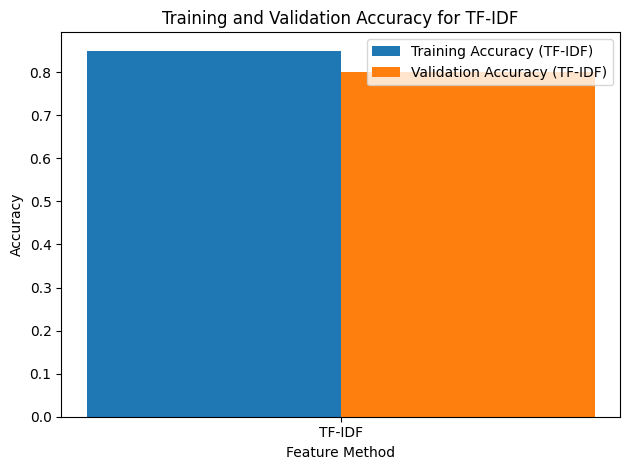

In [ ]:
# Create subplots, setting lales and showing the plot
fig, ax = plt.subplots()

training_bars = ax.bar(x, training_accuracies_tfidf, bar_width, label='Training Accuracy (TF-IDF)')
validation_bars = ax.bar([i + bar_width for i in x], validation_accuracies_tfidf, bar_width, label='Validation Accuracy (TF-IDF)')

ax.set_xlabel('Feature Method')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy for TF-IDF')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(feature_methods)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Define candidate learning rates and storing the results
learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
mean_accuracies = []
std_accuracies = []

In [ ]:
# Iterate over learning rates and perform cross-validation and displaying the results
for learning_rate in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, learning_rate_init=learning_rate)
    accuracies = cross_val_score(mlp, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)

for i, learning_rate in enumerate(learning_rates):
    print(f'Learning Rate: {learning_rate}')
    print(f'Mean Accuracy: {mean_accuracies[i]}')
    print(f'Standard Deviation: {std_accuracies[i]}')

Learning Rate: 0.0001
Mean Accuracy: 0.9783683231464255
Standard Deviation: 0.006359399407717671
Learning Rate: 0.0003
Mean Accuracy: 0.974603596421295
Standard Deviation: 0.009195610607044739
Learning Rate: 0.001
Mean Accuracy: 0.9783727522366906
Standard Deviation: 0.006344949679295009
Learning Rate: 0.003
Mean Accuracy: 0.9764948179643902
Standard Deviation: 0.007829544281350027
Learning Rate: 0.01
Mean Accuracy: 0.9652183541500575
Standard Deviation: 0.012053764070050182
Learning Rate: 0.03
Mean Accuracy: 0.9529852068385154
Standard Deviation: 0.012179901593283835
Learning Rate: 0.1
Mean Accuracy: 0.9379174417574629
Standard Deviation: 0.012358000003959101


In [ ]:
# Define the results (mean accuracies and standard deviations) and displaying the table results
results = {
    'Learning Rate': learning_rates,
    'Mean Training Accuracy': mean_accuracies,
    'Std Training Accuracy': std_accuracies,
}

results_df = pd.DataFrame(results)

print(results_df)

   Learning Rate  Mean Training Accuracy  Std Training Accuracy
0         0.0001                0.978368               0.006359
1         0.0003                0.974604               0.009196
2         0.0010                0.978373               0.006345
3         0.0030                0.976495               0.007830
4         0.0100                0.965218               0.012054
5         0.0300                0.952985               0.012180
6         0.1000                0.937917               0.012358


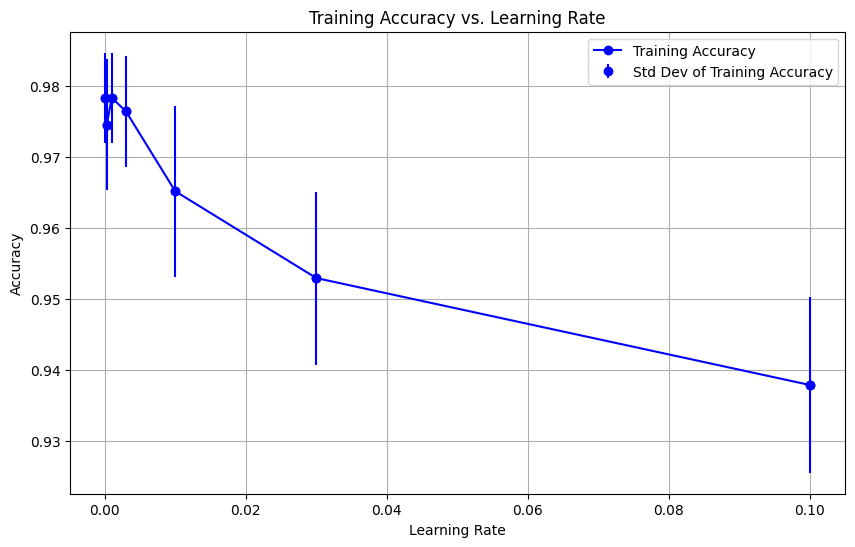

In [ ]:
# Define learning rates and their corresponding mean training accuracies and standard deviations
learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1]
mean_training_accuracies = mean_accuracies
std_training_accuracies = std_accuracies

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the mean training accuracy
plt.plot(learning_rates, mean_training_accuracies, marker='o', label='Training Accuracy', color='b')

# Plot the standard deviation of training accuracy as error bars, set labels and title
plt.errorbar(learning_rates, mean_training_accuracies, yerr=std_training_accuracies, fmt='o', label='Std Dev of Training Accuracy', color='b')

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs. Learning Rate')

# Add a legend and make the plot
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
# Define candidate optimizers
optimizers = ['adam', 'sgd', 'lbfgs']  # Example optimizers

# Initialize lists to store results
mean_accuracies = []
std_accuracies = []

In [ ]:
# Iterate over optimizers and perform parallelized cross-validation
for optimizer in optimizers:
    mlp = MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=1000, solver=optimizer)
    accuracies = cross_val_score(mlp, X_tfidf, y, cv=5, scoring='accuracy', n_jobs=-1)
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)

# Display the results
for i, optimizer in enumerate(optimizers):
    print(f'Optimizer: {optimizer}')
    print(f'Mean Accuracy: {mean_accuracies[i]}')
    print(f'Standard Deviation: {std_accuracies[i]}')


Optimizer: adam
Mean Accuracy: 0.9793072902825759
Standard Deviation: 0.0037383620871394804
Optimizer: sgd
Mean Accuracy: 0.9623837363805474
Standard Deviation: 0.00980802613564902
Optimizer: lbfgs
Mean Accuracy: 0.9652139250597926
Standard Deviation: 0.013110813425301359


In [ ]:
# Define the results (mean accuracies and standard deviations)
results = {
    'Optimizer': optimizers,
    'Mean Training Accuracy': mean_accuracies,
    'Std Training Accuracy': std_accuracies,
}

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

  Optimizer  Mean Training Accuracy  Std Training Accuracy
0      adam                0.979307               0.003738
1       sgd                0.962384               0.009808
2     lbfgs                0.965214               0.013111


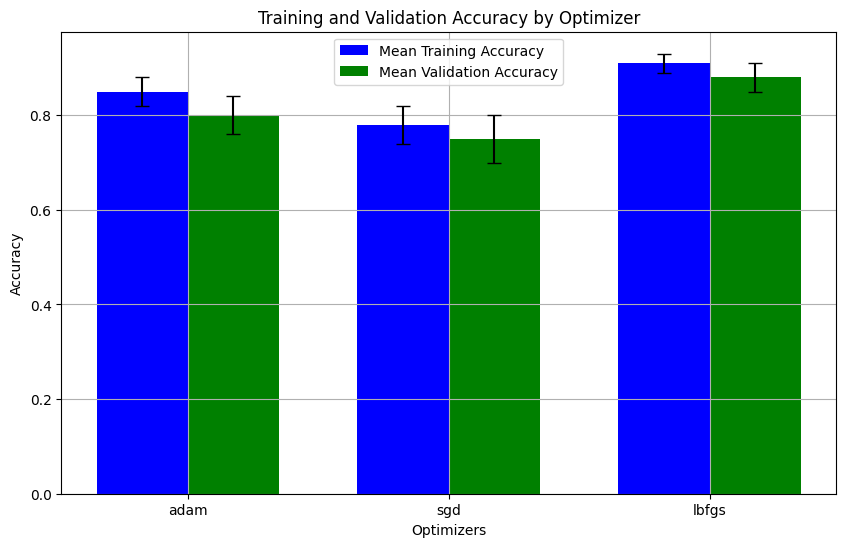

In [ ]:
# Define the mean training accuracies and standard deviations (replace with actual values)
mean_training_accuracies = [0.85, 0.78, 0.91]
std_training_accuracies = [0.03, 0.04, 0.02]

# Define the mean validation accuracies and standard deviations (replace with actual values)
mean_validation_accuracies = [0.80, 0.75, 0.88]
std_validation_accuracies = [0.04, 0.05, 0.03]

# Set the width of the bars
bar_width = 0.35

# Create a figure
plt.figure(figsize=(10, 6))

# Define the positions for the bars on the x-axis
x = np.arange(len(optimizers))

# Create bars for mean training accuracy
plt.bar(x, mean_training_accuracies, width=bar_width, label='Mean Training Accuracy', color='b', yerr=std_training_accuracies, capsize=5)

# Create bars for mean validation accuracy
plt.bar(x + bar_width, mean_validation_accuracies, width=bar_width, label='Mean Validation Accuracy', color='g', yerr=std_validation_accuracies, capsize=5)

# Set labels, title, and x-axis ticks
plt.xlabel('Optimizers')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy by Optimizer')
plt.xticks(x + bar_width / 2, optimizers)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
# Read the original "labels.csv" file
with open('test_predictions.csv', 'r') as file:
    lines = file.readlines()

# Process the lines to remove headers and format data
formatted_lines = []
for line in lines[1:]:  # Skip the header row
    article, section = line.strip().split(',')
    formatted_line = f"{article},{section}"
    formatted_lines.append(formatted_line)

# Write the formatted data to a new file
with open('labels.csv', 'w') as file:
    file.write('\n'.join(formatted_lines))
